<a href="https://colab.research.google.com/github/joaochenriques/TurbulenceLab/blob/main/TurbulenceLab_PostProcess_V01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assign the google_link to a '*.h5' file stored in your grive


In [1]:
google_link = 'https://drive.google.com/file/d/1IcAEOSKGW5kyhw4t3vg3ZZ9GTDNbHd9L/view?usp=sharing'
H5_FILENAME = 'Turbulence_Lab.h5'

## Import libs

In [2]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import h5py
import matplotlib.pyplot as mpl
import numpy as np
import pandas as pd
import gdown

In [4]:
# If running python on Windows operating system, copy the file:
# https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py
# to the working folder before running the notebook

import pathlib
if not pathlib.Path("mpl_utils.py").exists():
  !curl -O https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py 

import mpl_utils as mut
mut.config_plots()

%config InlineBackend.figure_formats = ['svg']
mpl.rcParams["figure.figsize"] = (6,4.5)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3483  100  3483    0     0  29769      0 --:--:-- --:--:-- --:--:-- 29769


# Download test case

In [5]:
gdown.download(google_link, H5_FILENAME, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1IcAEOSKGW5kyhw4t3vg3ZZ9GTDNbHd9L
To: /content/Turbulence_Lab.h5
100%|██████████| 230M/230M [00:02<00:00, 78.1MB/s]


'Turbulence_Lab.h5'

## Read data file and print test cases name

In [6]:
hf = h5py.File( H5_FILENAME, 'r' )
list( hf.keys() )

['Test_02', 'Test_03', 'Test_Central', 'Test_lateral']

## Save all test cases as comma separated values (*.csv)

In [7]:
for test in hf.keys():
    print( f'Save case: {test}' )
    times = np.array( hf[ test + '/time'] )
    velocity = np.array( hf[ test + '/hotwire'] )

    data = { 't [s]': times, 'u [m/s]': velocity }
    df_save = pd.DataFrame( data )
    df_save.to_csv( test + '.csv', index=False )

Save case: Test_02
Save case: Test_03
Save case: Test_Central
Save case: Test_lateral


## Zip all '*.csv' files in a file called 'DataFiles.zip' for download

In [8]:
!zip -9 DataFiles.zip  *.csv 

  adding: Test_02.csv (deflated 83%)
  adding: Test_03.csv (deflated 84%)
  adding: Test_Central.csv (deflated 89%)
  adding: Test_lateral.csv (deflated 88%)


## Plot one case

In [9]:
times = np.array( hf['Test_lateral/time'] )
velocity = np.array( hf['Test_lateral/hotwire'] )

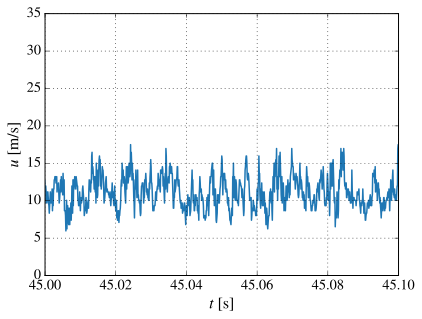

In [11]:
mpl.figure(1)
mpl.plot( times, velocity )
mpl.xlabel( '$t$ [s]')
mpl.ylabel( '$u$ [m/s]')

mpl.xlim( 45, 45.1 )
mpl.grid()

mpl.savefig( 'velocity_zoom.pdf', bbox_inches='tight', pad_inches=0.02 )
mpl.savefig( 'velocity_zoom.svg', bbox_inches='tight', pad_inches=0.02 )
mpl.savefig( 'velocity_zoom.png', bbox_inches='tight', pad_inches=0.02 );

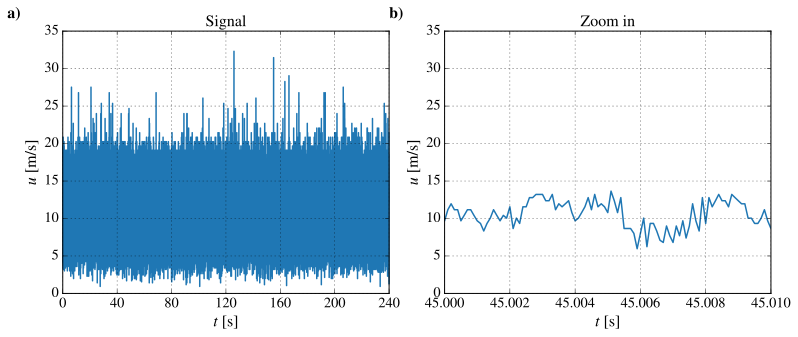

In [15]:
fig, (ax1, ax2) = mpl.subplots(1,2, figsize=(12, 4.5) )
fig.subplots_adjust( wspace = 0.17 )

ax1.set_title('Signal')
ax1.plot( times, velocity )
ax1.set_xlabel( '$t$ [s]')
ax1.set_ylabel( '$u$ [m/s]')
ax1.set_xlim( 0, 240 )
ax1.xaxis.set_major_locator(mpl.MultipleLocator(40))
ax1.grid()
ax1.text(-0.17, 1.05, 'a)', transform=ax1.transAxes, size=16, weight='semibold')

ax2.set_title('Zoom in')
ax2.plot( times, velocity )
ax2.set_xlabel( '$t$ [s]')
ax2.set_ylabel( '$u$ [m/s]')
ax2.set_xlim( 45, 45.01 )
ax2.grid()
ax2.text(-0.17, 1.05, 'b)', transform=ax2.transAxes, size=16, weight='semibold')

mpl.savefig( 'velocity_dual.pdf', bbox_inches='tight', pad_inches=0.02 )
mpl.savefig( 'velocity_dual.svg', bbox_inches='tight', pad_inches=0.02 )
mpl.savefig( 'velocity_dual.png', bbox_inches='tight', pad_inches=0.02 );